# Import Required Libraries
Import necessary libraries such as random, matplotlib, and numpy.

In [2]:
# Import Required Libraries
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define Helper Functions
Define helper functions including show(), line_intersection(), calculate_z_coordinate(), and calculate_inner_point().

In [3]:
# Define Helper Functions

def show(x, y, z, ax_2d):
    plt.cla()
    ax_2d.scatter(x, y, c='r', marker='o')

    # Annotate each point with its index
    for idx, (x_coord, y_coord) in enumerate(zip(x, y)):
        ax_2d.annotate(idx, (x_coord, y_coord), textcoords="offset points", xytext=(0, 10), ha='center')

    def line_intersection(A, B, C, D):
        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        xdiff = (A[0] - B[0], C[0] - D[0])
        ydiff = (A[1] - B[1], C[1] - D[1])

        div = det(xdiff, ydiff)
        if div == 0:
            raise Exception('Lines do not intersect')

        d = (det(A, B), det(C, D))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return x, y

    def calculate_z_coordinate(i, intersection_point):
        z_A = z[i]
        z_B = z[i + 1]
        if x[i] != x[i + 1]:
            return z_A + (z_B - z_A) * ((intersection_point[0] - x[i]) / (x[i + 1] - x[i]))
        else:
            return z_A + (z_B - z_A) * ((intersection_point[1] - y[i]) / (y[i + 1] - y[i]))

    overlapping_lines = [[] for _ in range(len(x))]
    for i in range(len(x) - 1):
        for j in range(len(x) - 1):
            if i == j:
                continue

            def ccw(A, B, C):
                return (C[1] - A[1]) * (B[0] - A[0]) >= (B[1] - A[1]) * (C[0] - A[0])

            A = (x[i], y[i])
            B = (x[i + 1], y[i + 1])
            C = (x[j], y[j])
            D = (x[j + 1], y[j + 1])

            if ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D):
                inter = line_intersection(A, B, C, D)
                z1 = calculate_z_coordinate(i, inter)
                z2 = calculate_z_coordinate(j, inter)
                if z1 > z2:
                    overlapping_lines[j].append(inter)
                else:
                    overlapping_lines[i].append(inter)

    for i, line in enumerate(overlapping_lines):
        if i == len(overlapping_lines) - 1:
            continue
        if x[i] > x[i + 1]:
            overlapping_lines[i] = sorted(line, key=lambda point: point[0], reverse=True)
        else:
            overlapping_lines[i] = sorted(line, key=lambda point: point[0])

    for i, l in enumerate(overlapping_lines):
        if i == len(overlapping_lines) - 1:
            continue
        start_point = (x[i], y[i])
        end_point = (x[i + 1], y[i + 1])

        if l == []:
            ax_2d.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color='r', linewidth=2)
        else:
            def calculate_inner_point(A, B, l):
                return (A[0] + l * (B[0] - A[0]), A[1] + l * (B[1] - A[1]))

            t01 = calculate_inner_point(start_point, l[0], 0.8)
            t02 = calculate_inner_point(l[len(l) - 1], end_point, 0.2)
            ax_2d.plot((start_point[0], t01[0]), (start_point[1], t01[1]), color='b', linewidth=2)
            for index in range(len(l) - 1):
                t1 = calculate_inner_point(l[index], l[index + 1], 0.2)
                t2 = calculate_inner_point(l[index], l[index + 1], 0.8)
                ax_2d.plot((t1[0], t2[0]), (t1[1], t2[1]), color='g', linewidth=2)
                start_point = l[index]

            ax_2d.plot((t02[0], end_point[0]), (t02[1], end_point[1]), color='b', linewidth=2)
    ax_2d.set_xlabel('X Label')
    ax_2d.set_ylabel('Y Label')
    ax_2d.set_title('2D Projection of 3D Points')
    return ax_2d

# Generate Random Points in 3D
Generate random points in 3D space and sort them to follow the surfaces.

In [4]:
def rotation_matrix_x(theta):
    """
    Create a rotation matrix for rotating around the x-axis by theta radians.
    """
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rotation_matrix_y(theta):
    """
    Create a rotation matrix for rotating around the y-axis by theta radians.
    """
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def rotation_matrix_z(theta):
    """
    Create a rotation matrix for rotating around the z-axis by theta radians.
    """
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

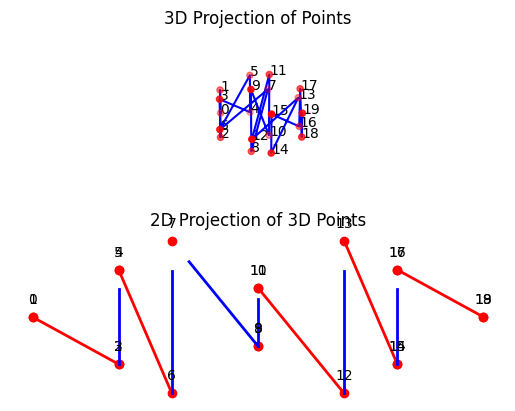

In [ ]:
from matplotlib.animation import FuncAnimation

# Generate random points in 3D
points = [(random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(15)]
phi = (1 + np.sqrt(5)) / 2  # Golden ratio
points = [
    (-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1),
    (1, -1, -1), (1, -1, 1), (1, 1, -1), (1, 1, 1),
    (0, -1/phi, -phi), (0, -1/phi, phi), (0, 1/phi, -phi), (0, 1/phi, phi),
    (-1/phi, -phi, 0), (-1/phi, phi, 0), (1/phi, -phi, 0), (1/phi, phi, 0),
    (-phi, 0, -1/phi), (-phi, 0, 1/phi), (phi, 0, -1/phi), (phi, 0, 1/phi)
]

# Sort points to follow the surfaces
sorted_points = sorted(points, key=lambda p: (p[0], p[1], p[2]))
points = sorted_points
x, y, z = zip(*points)

# Scatter plot of the points
fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212)

# Function to update the plot
def update(num, x, y, z, ax1, ax2):
    theta = num / 100 * 2 * np.pi
    R_x = rotation_matrix_x(theta)
    R_y = rotation_matrix_y(theta)
    R_z = rotation_matrix_z(theta)
    rotated_points = [np.dot(R_z, np.dot(R_y, np.dot(R_x, point))) for point in points]
    
    x, y, z = zip(*rotated_points)
    
    ax1.cla()
    ax1.scatter(x, y, z, c='r', marker='o')
    ax1.set_xlabel('X Label')
    ax1.set_ylabel('Y Label')
    ax1.set_zlabel('Z Label')
    ax1.set_title('3D Projection of Points')

    # Annotate each point with its index
    for idx, (x_coord, y_coord, z_coord) in enumerate(zip(x, y, z)):
        ax1.text(x_coord, y_coord, z_coord, '%d' % idx, size=10, zorder=1, color='k')

    ax1.set_axis_off()
    # Connect the points with lines
    ax1.plot(x, y, z, color='b')
    ax2 = show(x, y, z, ax2)
    ax2.set_axis_off()
    return ax1, ax2

# Create an animation
ani = FuncAnimation(fig, update, frames=100, fargs=(x, y, z, ax1, ax2), interval=100)

# Save the animation as a video file
ani.save('3d_rotation.mp4', writer='ffmpeg', fps=30)